In [1]:
from google.colab import files
uploaded = files.upload()

Saving voice.csv to voice.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv('voice.csv')

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42
)

In [12]:
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)
X_train_scaled = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test_scaled  = (X_test - X_train_min) / (X_train_max - X_train_min)
m,n=X_train_scaled.shape

In [10]:
print(f"Date de antrenare: {X_train.shape[0]} mostre")
print(f"Date de testare: {X_test.shape[0]} mostre")

Date de antrenare: 2534 mostre
Date de testare: 634 mostre


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Accuracy, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
model=Sequential([
    Dense(units=128, activation='relu', input_shape=(n,)),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'recall']
)


In [18]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)
]

In [19]:
model.summary()

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=callbacks
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,029 (129.02 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,020 (86.02 KB)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9786 - loss: 0.0576 - recall: 0.9745 - val_accuracy: 0.9843 - val_loss: 0.0506 - val_recall: 0.9758 - learning_rate: 0.0010
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9788 - loss: 0.0594 - recall: 0.9716 - val_accuracy: 0.9803 - val_loss: 0.0547 - val_recall: 0.9677 - learning_rate: 0.0010
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9825 - loss: 0.0561 - recall: 0.9780 - val_accuracy: 0.9882 - val_loss: 0.0416 - val_recall: 0.9758 - learning_rate: 0.0010
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9761 - loss: 0.0677 - recall: 0.9749 - val_accuracy: 0.9803 - val_loss: 0.0505 - val_recall: 0.9758 - learning_rate: 0.0010
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - loss: 0.0533 - recall: 0.9757 - val_accuracy: 0.9843 - val_loss: 0.0513 - val_recall: 0.9758 - learning_rate: 0.0010
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [23]:
loss, accuracy, recall = model.evaluate(X_test_scaled, y_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9785 - loss: 0.0737 - recall: 0.9798 


In [24]:
print(f"Acuratetea modelului pe datele de testare: {accuracy * 100:.2f}%")
print(f"Recall-ul modelului pe datele de testare: {recall * 100:.2f}%")
print(f"Loss-ul modelului pe datele de testare: {loss:.4f}")

Acuratetea modelului pe datele de testare: 97.79%
Recall-ul modelului pe datele de testare: 97.33%
Loss-ul modelului pe datele de testare: 0.0618


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


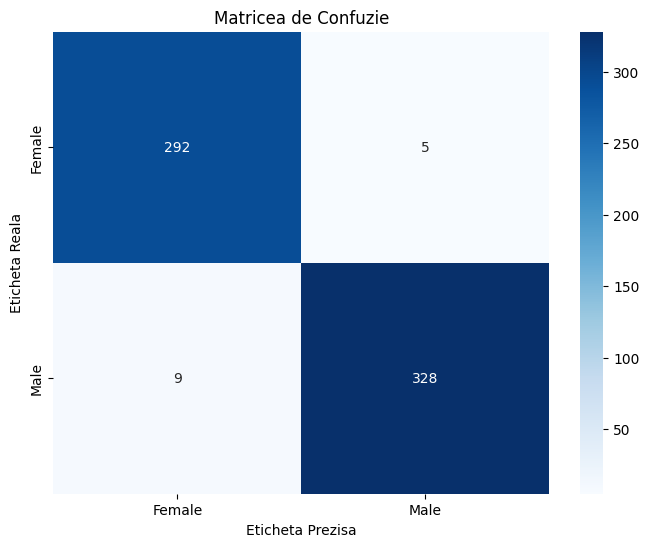

In [27]:
y_pred_prob = model.predict(X_test_scaled)

y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Female', 'Male'],
            yticklabels=['Female', 'Male'])

plt.title('Matricea de Confuzie')
plt.ylabel('Eticheta Reala')
plt.xlabel('Eticheta Prezisa')
plt.show()
